### Problem 2.24
- For each final hypothesis g1, g2, ..., gk, estimate the average hypothesis for a single x with the following equation:
\begin{equation*}
\bar{g}(x) = \frac{1}{K}\sum_{k=1}^{K}g_{k}(x)
\end{equation*}
- Generate K datasets. Then, for each x can calculate gbar(x) using the above equation. Next, calculate bias for each x: bias(x) = (g<sub>avg</sub>(x) - f(x))<sup>2</sup>. After that, calculate variance for each x: var(x) = (g<sup>(D)</sup>(x) - g<sub>avg</sub>(x))<sup>2</sup>]. Finally, calculate the expected value of the out of sample error E<sub>D</sub>[E<sub>out</sub>(g<sup>(D)</sup>)] with the following equation: E<sub>D</sub>[E<sub>out</sub>(g<sup>(D)</sup>)] = E<sub>x</sub>[bias(x) + var(x)].
- See results of experiment and plot below.
- See analytic computation of Eout, bias, and var in experiment results.

bias      : 0.26
var       : 0.22
e_out     : 0.48


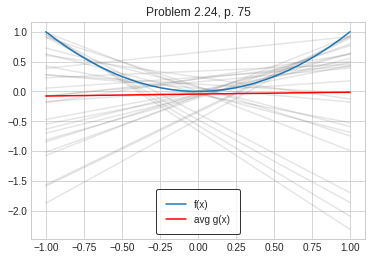

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def main():
    num_datasets = 30
    target_fn = np.square
    
    p1, p2 = get_experiment_data(num_datasets, target_fn)
    m = get_slope(p1, p2)
    b = get_y_intercept(p1, m)

    bias = calculate_bias(get_x(num_datasets), m, b, target_fn)
    var = calculate_var(get_x(num_datasets), m, b)
    
    print_data('bias', bias)
    print_data('var', var)
    print_data('e_out', round(bias + var, 2))

    plot_exp(m, b, target_fn)


def print_data(label, value, width=10):
    print('{:{}}: {}'.format(label, width, value))


def get_experiment_data(num_datasets, target_fn):
    num_samples = num_datasets * 2
    s = np.random.uniform(-1, 1, num_samples)
    s = s.reshape(num_datasets, 2)

    x1, x2 = s[:, 0], s[:, 1]
    y1, y2 = target_fn(x1), target_fn(x2)

    p1 = np.column_stack((x1, y1))
    p2 = np.column_stack((x2, y2))

    return p1, p2


def get_slope(p1, p2):
    # slope = (y2 - y1) / (x2 - x1)
    return (p2[:, 1] - p1[:, 1]) / (p2[:, 0] - p1[:, 0])


def get_y_intercept(p, m):
    # y - y1 = m(x - x1)
    # y - y1 = mx - mx1
    # y = mx - mx1 + y1
    # let b = -mx1 + y1
    return -m * p[:, 0] + p[:, 1]


def calculate_bias(x, m, b, target_fn):
    g_avg = get_g_avg_vect(x, m, b)
    f_x = target_fn(x)
    return round(mean_sum_squared_error(g_avg, f_x), 2) 


def calculate_var(x, m, b):
    g = hypothesis_fn(m, x, b)
    g_avg = get_g_avg_vect(x, m, b)
    return round(mean_sum_squared_error(g, g_avg), 2)


def get_g_avg_vect(x, m, b):
    g_avg = np.full_like(x, 1)
    for i, this_x in enumerate(x):
        g_avg[i] = calculate_g_avg(m, this_x, b)
    return g_avg


def calculate_g_avg(m, x, b):
    # this must take in a single x
    x_vect = np.full_like(m, x)
    return np.average(hypothesis_fn(m, x_vect, b))


def mean_sum_squared_error(x1, x2):
    return np.average(np.square(x1 - x2))


def get_x(num_pts):
    return np.linspace(-1, 1, num_pts)


def hypothesis_fn(m, x, b):
    return m * x + b


def plot_exp(m, b, target_fn):
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots()
    
    ax.set(title='Problem 2.24, p. 75')

    x = np.linspace(-1, 1, 30)

    # plot each hypothesis fn
    for this_m, this_b in zip(m, b):
        ax.plot(x, hypothesis_fn(this_m, x, this_b), color='gray', alpha=0.2)

    ax.plot(x, target_fn(x), label='f(x)')
    ax.plot(x, get_g_avg_vect(x, m, b), color='r', label='avg g(x)')
    
    ax.legend(facecolor='w', fancybox=True, frameon=True, edgecolor='black', borderpad=1)
    plt.show()


if __name__ == '__main__':
    main()